# Building a neural net

Let's do this.

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

2024-10-20 18:26:33.123431: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-20 18:26:33.127160: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-20 18:26:33.138177: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-20 18:26:33.156101: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-20 18:26:33.160825: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-20 18:26:33.173906: I tensorflow/core/platform/cpu_feature_gu

In [2]:
mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [3]:
train_images.shape

(60000, 28, 28)

In [4]:
test_images.shape

(10000, 28, 28)

In [5]:
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

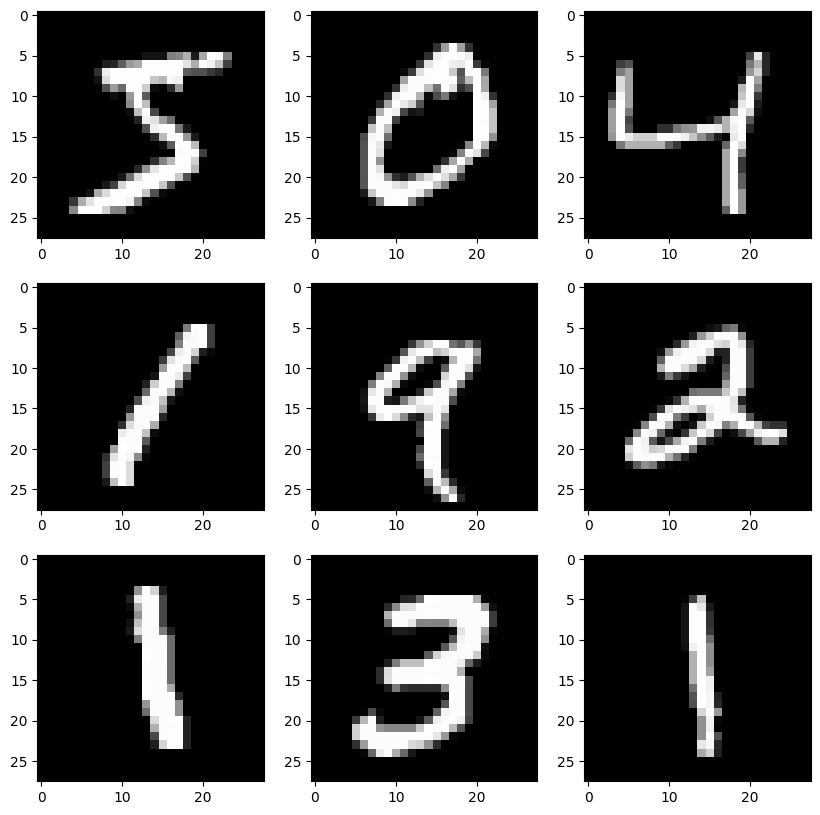

In [6]:
fig, ax = plt.subplots(3, 3, figsize=(10, 10))
a = 0
for i in range(3):
    for j in range(3):
        ax[i, j].imshow(train_images[a], cmap='gray')
        a += 1

In [18]:
validation_images = train_images[:5000] / 255
validation_labels = train_labels[:5000]

train_images_full = train_images
train_labels_full = train_labels

train_images = train_images[5000:] / 255
train_labels = train_labels[5000:]

test_images = test_images / 255

6


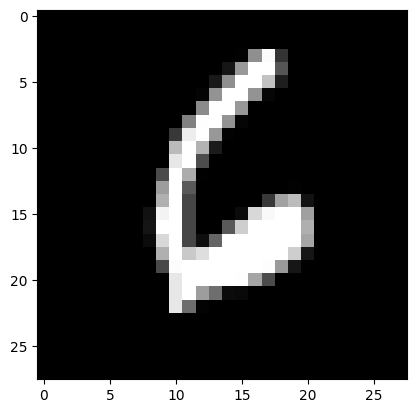

In [8]:
index = 3
print(train_labels[index])
plt.imshow(train_images[index], cmap='gray')

In [9]:
class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

# Model Time

(but why male models?)

In [10]:
model = keras.models.Sequential()
model.add(keras.layers.Input(shape=(28, 28)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(300, activation='relu'))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax')) # Softmax is useful for classification problems where each class is independent

I0000 00:00:1729473996.564018   11339 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-10-20 18:26:36.564531: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2343] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
model.layers

[<Flatten name=flatten, built=True>,
 <Dense name=dense, built=True>,
 <Dense name=dense_1, built=True>,
 <Dense name=dense_2, built=True>]

In [13]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [14]:
history = model.fit(train_images, train_labels, epochs=30, validation_data=(validation_images, validation_labels), batch_size=32)

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7164 - loss: 1.0762 - val_accuracy: 0.9132 - val_loss: 0.3084
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9126 - loss: 0.3056 - val_accuracy: 0.9340 - val_loss: 0.2437
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9309 - loss: 0.2452 - val_accuracy: 0.9446 - val_loss: 0.2004
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9430 - loss: 0.2020 - val_accuracy: 0.9524 - val_loss: 0.1734
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9503 - loss: 0.1767 - val_accuracy: 0.9564 - val_loss: 0.1554
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9528 - loss: 0.1595 - val_accuracy: 0.9610 - val_loss: 0.1418
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9605 - loss: 0.1385 - val_accuracy: 0.9640 - val_loss: 0.1315
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9648 - loss: 0.1250 - 

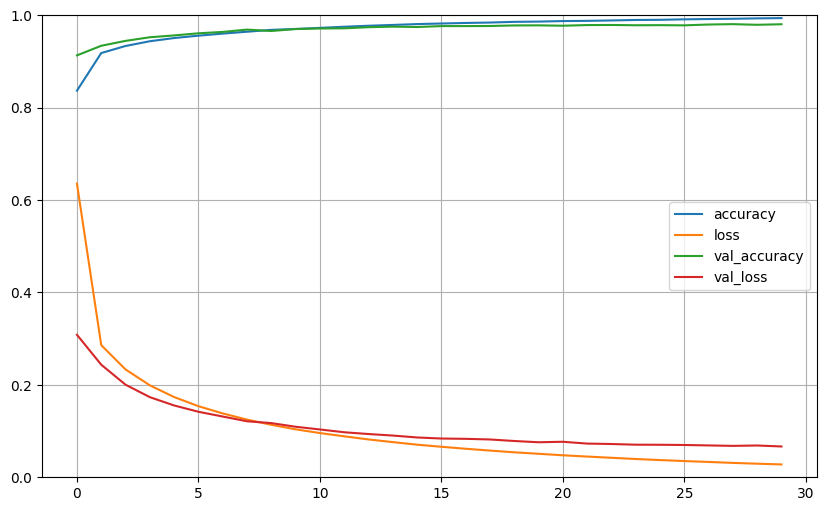

In [16]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(10, 6))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [19]:
model.evaluate(test_images, test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9737 - loss: 0.0863


[0.07324568182229996, 0.9782000184059143]

In [20]:
model.predict(test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[5.2701978e-07, 5.0802932e-08, 6.3797503e-05, ..., 9.9953014e-01,
        5.2839516e-07, 1.1517150e-05],
       [7.8457612e-07, 1.1873129e-05, 9.9954849e-01, ..., 5.3240086e-11,
        6.1950391e-06, 8.0504475e-12],
       [4.6565441e-05, 9.9706072e-01, 5.0090218e-04, ..., 1.1889519e-03,
        8.6120574e-04, 1.0989638e-05],
       ...,
       [5.4185559e-11, 3.7954181e-10, 7.0166642e-12, ..., 4.4399690e-06,
        3.3327757e-07, 6.2925542e-06],
       [4.3349171e-08, 5.7055445e-09, 8.2861057e-10, ..., 1.9274780e-09,
        6.5213768e-05, 1.2758308e-09],
       [2.0630458e-07, 4.8887550e-10, 1.5215980e-07, ..., 1.3846544e-12,
        4.8121751e-09, 4.1190143e-10]], dtype=float32)

In [21]:
label_prob = model.predict(test_images)
label_classes = label_prob.argmax(axis=1)
label_classes

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 996us/step


array([7, 2, 1, ..., 4, 5, 6])

In [22]:
confusion_matrix = tf.math.confusion_matrix(test_labels, label_classes)

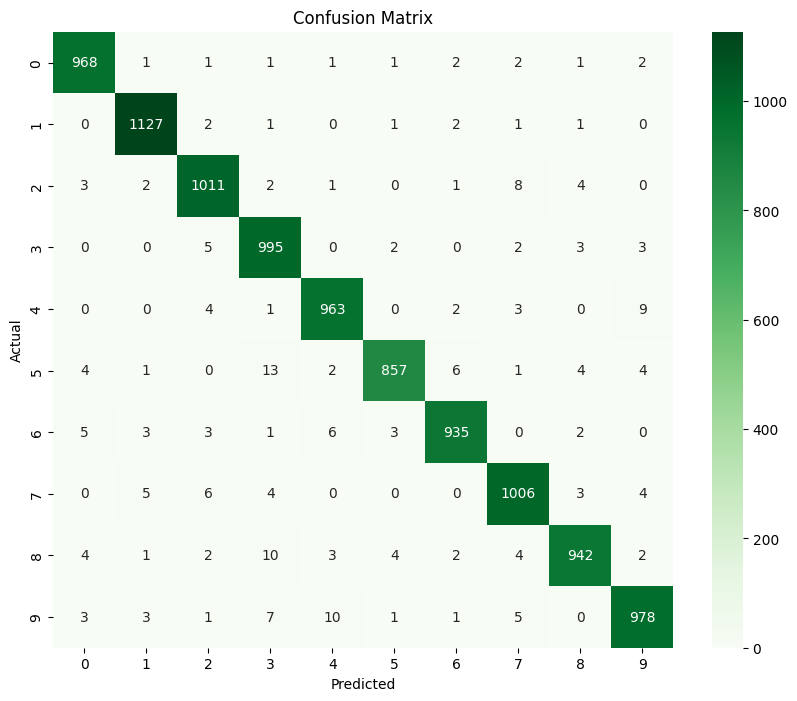

In [23]:
import seaborn as sns

fig = sns.heatmap(confusion_matrix, annot=True, fmt='g', cmap='Greens')

fig.set_xlabel('Predicted')
fig.set_ylabel('Actual')
fig.set_title('Confusion Matrix')
fig.set_xticklabels(class_names)
fig.set_yticklabels(class_names)
fig.figure.set_size_inches(10, 8)

plt.show()